# Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = r"C:\Users\Chris\Desktop\flowers"
CATEGORIES = ["daisy","dandelion","rose","sunflower","tulip"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cats or dogs directory
    print(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    


daisy


<Figure size 640x480 with 1 Axes>

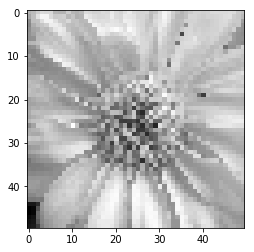

(50, 50)


In [2]:
import cv2

IMG_SIZE = 50
resize = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(resize, cmap='gray')
plt.show()
print(resize.shape)

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)# path to different shape directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data();

In [4]:
print(len(training_data))

4323


In [5]:
import random
random.shuffle(training_data)

In [6]:
X = []
y = []

In [7]:
for sample in training_data[:5]:
    print(sample[0], sample[1])

[[205 229 232 ... 133 116   1]
 [204 220 236 ... 116  17   5]
 [198 130 137 ... 105   6   4]
 ...
 [206 143  32 ... 108  98 150]
 [211  44 119 ...  59  53  90]
 [ 24  79  95 ... 100  26  53]] 2
[[ 6  4  4 ...  3 24  4]
 [ 6  6  5 ...  5 17  4]
 [ 8  6  4 ...  4  4  5]
 ...
 [ 3  3  3 ...  2  3  6]
 [ 9  5  4 ...  4  3  3]
 [16 30 17 ...  5  4  3]] 0
[[ 52  49  58 ...  10   9   8]
 [ 64  68  70 ...  11   7   1]
 [ 85  88  69 ...  12   7   2]
 ...
 [124 146  15 ...  17  19  16]
 [ 41 142  20 ...  14  16  16]
 [ 81 128  69 ...  11  20  36]] 4
[[ 39 156   4 ...   8  13   8]
 [ 60 109   2 ...  18  20  12]
 [134  21   1 ...  20  12  13]
 ...
 [ 93  95  99 ...  33  73  81]
 [126  86 117 ...  52  93 113]
 [ 94  73  71 ...  72 123 123]] 2
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 2 0 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 2


In [8]:
for features,label in training_data:
    X.append(features);
    y.append(label);

In [9]:
# Reshape data 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [10]:
# Normalize features (y is fine as a list)
X = X / 255;

In [11]:
import keras
y = keras.utils.to_categorical(y, num_classes=5)
y.shape

C:\Users\Chris\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(4323, 5)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

# Model

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D


# Build model
model = Sequential()

model.add(Conv2D(64,(10,10), input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(5,5)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(5))
model.add(Activation('softmax')) 

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

fit = model.fit(x_train,
          y_train, 
          batch_size=32, 
          shuffle=True, 
          epochs=5, 
          validation_split=0.1,
          verbose=2)

Train on 3501 samples, validate on 389 samples
Epoch 1/5
 - 5s - loss: 1.5863 - acc: 0.2531 - val_loss: 1.5429 - val_acc: 0.3033
Epoch 2/5
 - 5s - loss: 1.5246 - acc: 0.3071 - val_loss: 1.4961 - val_acc: 0.3316
Epoch 3/5
 - 5s - loss: 1.4851 - acc: 0.3430 - val_loss: 1.5004 - val_acc: 0.3316
Epoch 4/5
 - 5s - loss: 1.4579 - acc: 0.3610 - val_loss: 1.4832 - val_acc: 0.3445
Epoch 5/5
 - 5s - loss: 1.4085 - acc: 0.4047 - val_loss: 1.4411 - val_acc: 0.4010


In [15]:
# Evaluate Model
evaluate = model.evaluate(x_test, 
               y_test, 
               batch_size=32, 
               verbose=1 )
print("Loss:", evaluate)

433/433 [==============================] - 0s 613us/step
Loss: [1.3976706500416816, 0.4110854503808341]


In [19]:
# Predict classes using test data
model.predict_classes(x_test, 
                      batch_size=32, 
                      verbose=1)


433/433 [==============================] - 0s 597us/step
[4 4 4 0 4 1 0 0 3 3 3 1 4 0 1 3 0 1 1 4 3 4 4 4 1 0 0 1 0 3 4 3 0 4 0 3 3
 4 3 4 2 1 1 2 1 4 4 2 3 1 1 0 0 1 4 3 3 3 4 0 4 1 1 3 4 3 1 1 4 1 4 0 1 4
 4 0 4 4 3 0 4 2 1 1 4 1 4 0 4 1 3 1 0 3 2 4 2 2 4 2 3 0 3 1 4 0 3 1 4 0 1
 4 0 1 3 4 1 4 0 4 1 3 2 4 1 4 4 0 0 0 3 1 4 3 4 3 1 0 1 0 3 0 3 1 1 4 1 4
 3 3 1 2 4 0 3 4 1 4 0 0 4 0 4 0 4 0 4 0 3 0 1 0 1 0 0 4 3 3 4 3 4 4 0 4 3
 3 0 1 4 3 4 1 4 3 0 1 3 3 0 2 0 4 4 1 1 4 1 0 3 4 4 4 4 1 4 1 4 4 0 0 4 4
 3 1 1 1 0 0 3 1 3 3 2 4 0 0 0 1 3 4 1 4 0 1 4 0 0 4 4 3 4 0 0 0 3 3 0 1 4
 1 1 4 0 4 0 0 3 4 4 0 1 1 0 0 1 3 4 1 4 3 0 4 1 0 3 4 3 2 0 2 0 4 4 3 4 1
 1 4 0 0 3 1 0 3 1 3 0 4 1 1 4 4 3 1 1 0 0 0 0 3 0 4 1 1 4 1 1 0 3 1 2 4 0
 4 1 3 1 0 1 3 0 1 1 0 1 0 4 0 4 3 0 2 3 4 4 1 3 3 1 1 3 3 4 4 0 1 4 3 3 0
 3 0 2 0 4 3 3 1 1 4 4 3 4 1 3 3 1 3 3 1 3 3 3 2 3 4 4 0 4 1 4 0 4 3 0 1 0
 1 3 3 2 3 0 3 4 4 1 3 1 3 1 0 4 1 0 1 4 0 1 4 0 1 1] [[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 